In [2]:
from pydplace.api import Repos 
import os
api = Repos('/Users/aligiritlioglu/Desktop/PhD\ preliminary\ data/dplace-data-2.2.0/')
os.chdir('/Users/aligiritlioglu/Desktop/PhD preliminary data/dplace-data-2.2.0/Binford/')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv ('binforddata.csv')

In [4]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/Users/aligiritlioglu/Desktop/PhD preliminary data/dplace-data-2.2.0/Binford': ['.Rhistory', '.DS_Store', 'societies_mapping.csv', 'societies.csv', 'Binford Data Summary.csv', 'Heatmap_Canonical_Correlates_from_Y_and_data.jpg', 'README.md', 'untitled.txt', 'untitled1.txt', 'Heatmap_Canonical_Correlates_from_X_and_data.jpg', 'variables.csv', 'binforddata.csv', 'codes.csv']


In [5]:
#display(df)

In [6]:
#print(df.dtypes)

In [7]:
df = df[['soc_id', 'sub_case', 'year', 'var_id', 'code']]

In [8]:
#df.pivot_table(index='soc_id', columns='var_id', values='code')

In [9]:
df = df.pivot_table(index='soc_id', columns='var_id', values='code')

In [10]:
#display(df)

In [11]:
#cleaning the data / dropping all columns with more than 50% missing data

#df.loc[:, df.isnull().mean() < .5]

In [12]:
df = df.loc[:, df.isnull().mean() < .5]

In [13]:
#renaming the variables 
df = df.rename(columns={"B001": "reliance_on_gathering",
                   "B002": "reliance_on_hunting",
                   "B003": "reliance_on_fishing",
                   "B004": "main_subsistence_type",
                   "B005": "deviation_from_HGF",
                       "B006": "population",
                       "B007": "area_occupied",
                       "B008": "population_density",
                       "B009": "mobility",
                       "B010": "size_of_group_for_cooperation",
                       "B011": "size_of_camp_when_aggregated",
                       "B012": "size_of_periodic_aggregations",
                       "B013": "moves_p/_year",
                       "B014": "distance_moved_p/_year",
                       "B015": "household_size",
                       "B019": "polygyny",
                       "B020": "age_of_male_at_1st_marriage",
                       "B021": "age_of_female_at_1st_marriage",
                       "B024": "mean_household_size",
                       "B029": "jurisdictional_hierarchy_of_locals",
                       "B030": "intergroup_political_relationships",
                       "B031": "class_distinction",
                       "B032": "perogatives_of_leadership",
                       "B033": "use_of_money",
                       "B034": "economic_specialisation",
                       "B035": "marriage_organisation",
                       "B036": "community_facilities",
                       "B037": "ownership_of_resource_locations",
                       "B038": "system_of_state"
                        })

In [14]:
# no rows with more than 40% Nans so not deleting any from the official df 
#perc = 40.0 # Here N is 40
#min_count =  int(((100-perc)/100)*df.shape[1] + 1)
#df.dropna( axis=0, 
                    #thresh=min_count)

In [15]:
def histogram_intersection(a, b):
...     v = np.minimum(a, b).sum().round(decimals=1)
...     return v

In [16]:
df_cor = df.corr(method='spearman')
sns.set(font_scale=1)

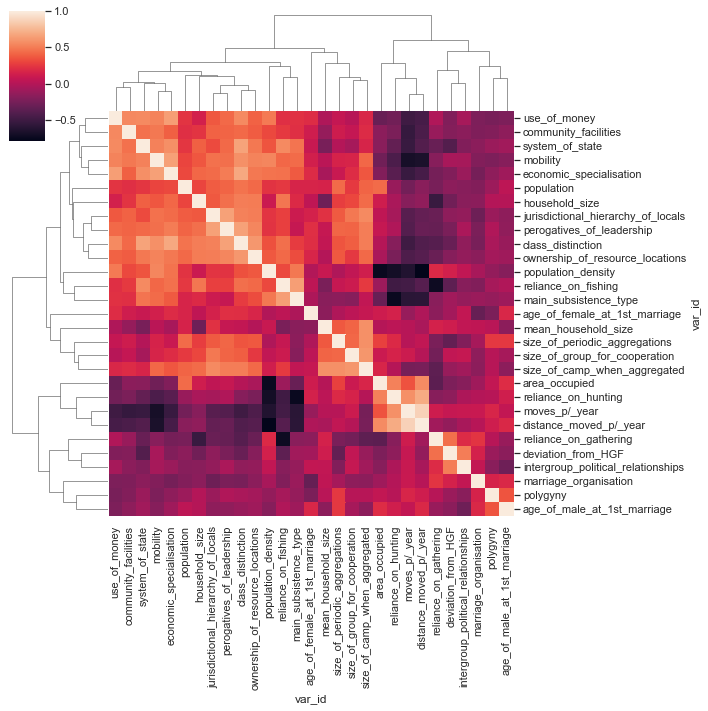

In [17]:
sns.clustermap(df_cor)


In [18]:
table = pd.read_csv ('Binford Data Summary.csv')

In [19]:
from IPython.display import display, HTML

In [20]:
display(HTML(table.to_html()))


,Name in Binford [code],Name in Tables/Plots,Definition,Values,Type of Variable
0,Subsistence economy: Gathering [B001],(reliance on gathering),"Group's dependence upon gathering of terrestrial plants, relative to other subsistence activities.",0.01 - 90.3,Continuous
1,Subsistence economy: Hunting [B002],(reliance on hunting),"Group's dependence upon hunting of terrestrial animals, relative to other subsistence activities",0.00 - 0.90,Continuous
2,Subsistence economy: Fishing [B003],(reliance on fishing),"Group's dependence upon fishing of aquatic organisms, relative to other subsistence activities",0.00 - 0.95,Continuous
3,Subsistence economy: Most important activity [B004],(main subsistence type),"Subsistence activity that provides the majority of a group's nutritional intake (hunting, gathering, or fishing)","1- hunting, 2- gathering, 3- fishing",Categorical
4,Subsistence economy: Deviation from HGF at documentation [B005],(deviation from HGF),"Character of a group's subsistence economy at the time of documentation (i.e., was susbsistence truly through hunting, gathering, fishing, only?). Groups are coded as either ""normal"" or ""suspect"".","1- Normal HGF, 2- Suspect (some exchanges with non-HGF)",Categorical
5,Population of ethnic group [B006],(population),Total number of persons to whom the the ethnographic description applies,23.0 - 14582.0,Continuous
6,Area occupied by ethnic group (square km) [B007],(area occupied),"Ethnographers' estimates of the total land area occupied by the group, in square kilometers",80.0 - 660000.0,Continuous
7,Population density (persons per square km) [B008],(population density),Population of ethnic group divided by area occupied by ethnic group (persons per square km),0.0025 - 3.887,Continuous
8,Mobility of group [B009],(mobility),Is the population mobile or sedentary?,"1- mobile, 2-sedentary",Categorical
9,Size of smallest group that regularly cooperates for subsistence [B010],(size of group for cooperation),"Mean size of the mobile consumer unit that camps together during the most dispersed phase of the settlement cycle. For sedentary groups, the entry indicates the size of the mobile task group operating out of a relatively permanent settlement, as in the case of family units moving together in a ‘walkabout’ strategy during some season of the year. (Binford's ""GRP1"").",5.6 - 70.0,Continuous


In [21]:
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA

In [22]:
features = df.drop('main_subsistence_type', axis=1)
# Separating out the features
#x = df.loc[:, features].values
x = df.drop('main_subsistence_type', axis=1)
# Separating out the target
y = df.loc[:,['main_subsistence_type']].values
# Standardizing the features
x1 = StandardScaler().fit_transform(x)

In [23]:
#KNN imputation
import numpy as np
from sklearn.impute import KNNImputer


In [24]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
x1 = imputer.fit_transform(x1)


In [25]:
y = imputer.fit_transform(y)

In [26]:
#multivariate imputation
#import numpy as np
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imp = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(x)
#IterativeImputer(random_state=0)
#x =(imp.transform(x))
#imp.fit(y)
#IterativeImputer(random_state=0)
#y =(imp.transform(y))

In [27]:
#PCA

pcamodel = PCA(n_components=10)

pca = pcamodel.fit_transform(x1)

principalDf = pd.DataFrame(data = pca
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])

In [28]:
#display(principalDf)

In [29]:
y = pd.DataFrame(y)

In [30]:
 mapping = {y.columns[0]:'Subsistence'}

In [31]:
y = y.rename(columns=mapping)

In [32]:
#display(y)

In [33]:
finalDf = pd.concat([principalDf, y], axis = 1)


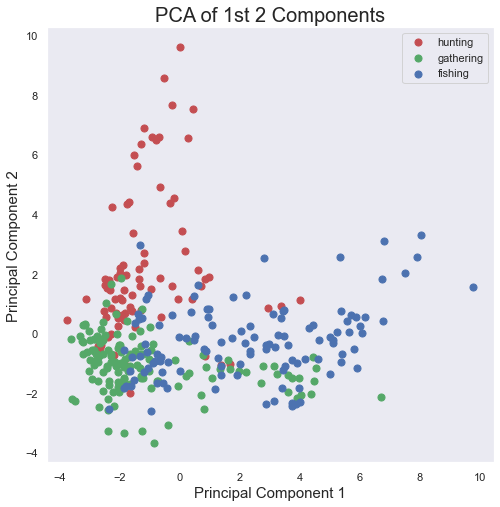

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of 1st 2 Components', fontsize = 20)
targets = [1, 2, 3]
legend = ['hunting', 'gathering', 'fishing']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Subsistence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(legend)
ax.grid()

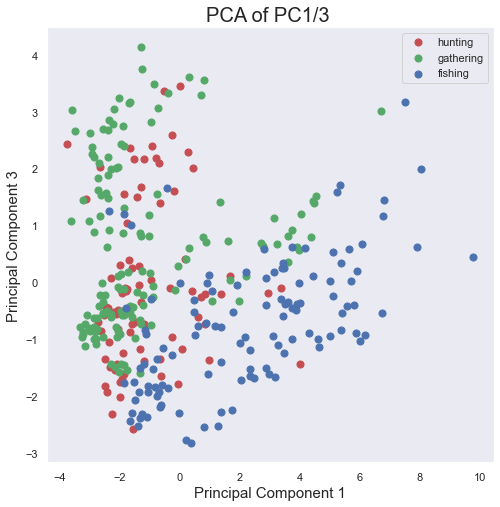

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA of PC1/3 ', fontsize = 20)
targets = [1, 2, 3]
legend = ['hunting', 'gathering', 'fishing']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Subsistence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 3']
               , c = color
               , s = 50)
ax.legend(legend)
ax.grid()

In [36]:
pcamodel.explained_variance_ 

array([7.63594924, 3.9161119 , 2.18714803, 1.69544174, 1.43454047,
       0.99037037, 0.91376164, 0.83369334, 0.77764227, 0.72604811])

In [37]:
pcamodel.explained_variance_ratio_

array([0.28615755, 0.14675648, 0.08196347, 0.06353676, 0.05375947,
       0.03711418, 0.03424326, 0.0312427 , 0.02914218, 0.02720869])

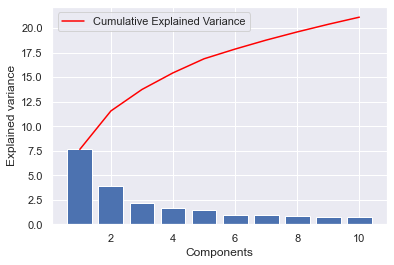

In [38]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

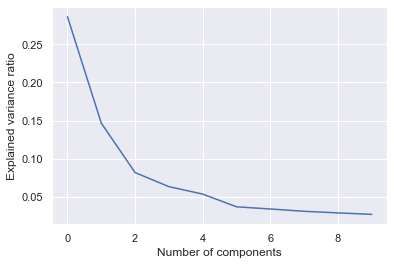

In [39]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio') #EXplained variance ratio
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [41]:
clm = x.columns

In [42]:
x2 = pd.DataFrame(x1, columns=list(clm))

In [43]:
#PCA 2 (for heatmap)

pcamodel2 = PCA(n_components=3)

pca2 = pcamodel2.fit_transform(x1)

principalDf = pd.DataFrame(data = pca2
             , columns = ['PC 1', 'PC 2', 'PC3'])

[Text(0, 0.5, 'PCA1'), Text(0, 1.5, 'PCA2'), Text(0, 2.5, 'PCA3')]

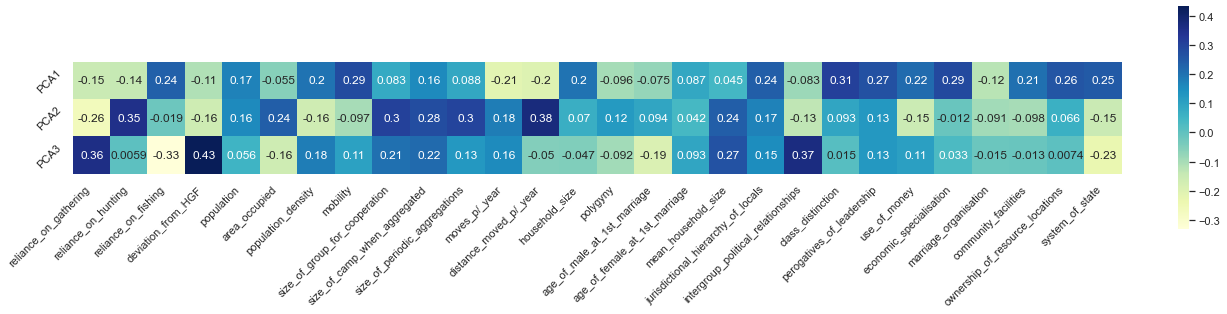

In [44]:
fig, ax = plt.subplots(figsize=(20, 25)) #do one with 3 / make it vertical 

ax = sns.heatmap(pcamodel2.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x2) for x2 in range(1,pcamodel2.n_components_+1)],
                 xticklabels=list(x2.columns),
                 cbar_kws={"fraction": 0.01}, annot=True
)
ax.set_aspect("equal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')

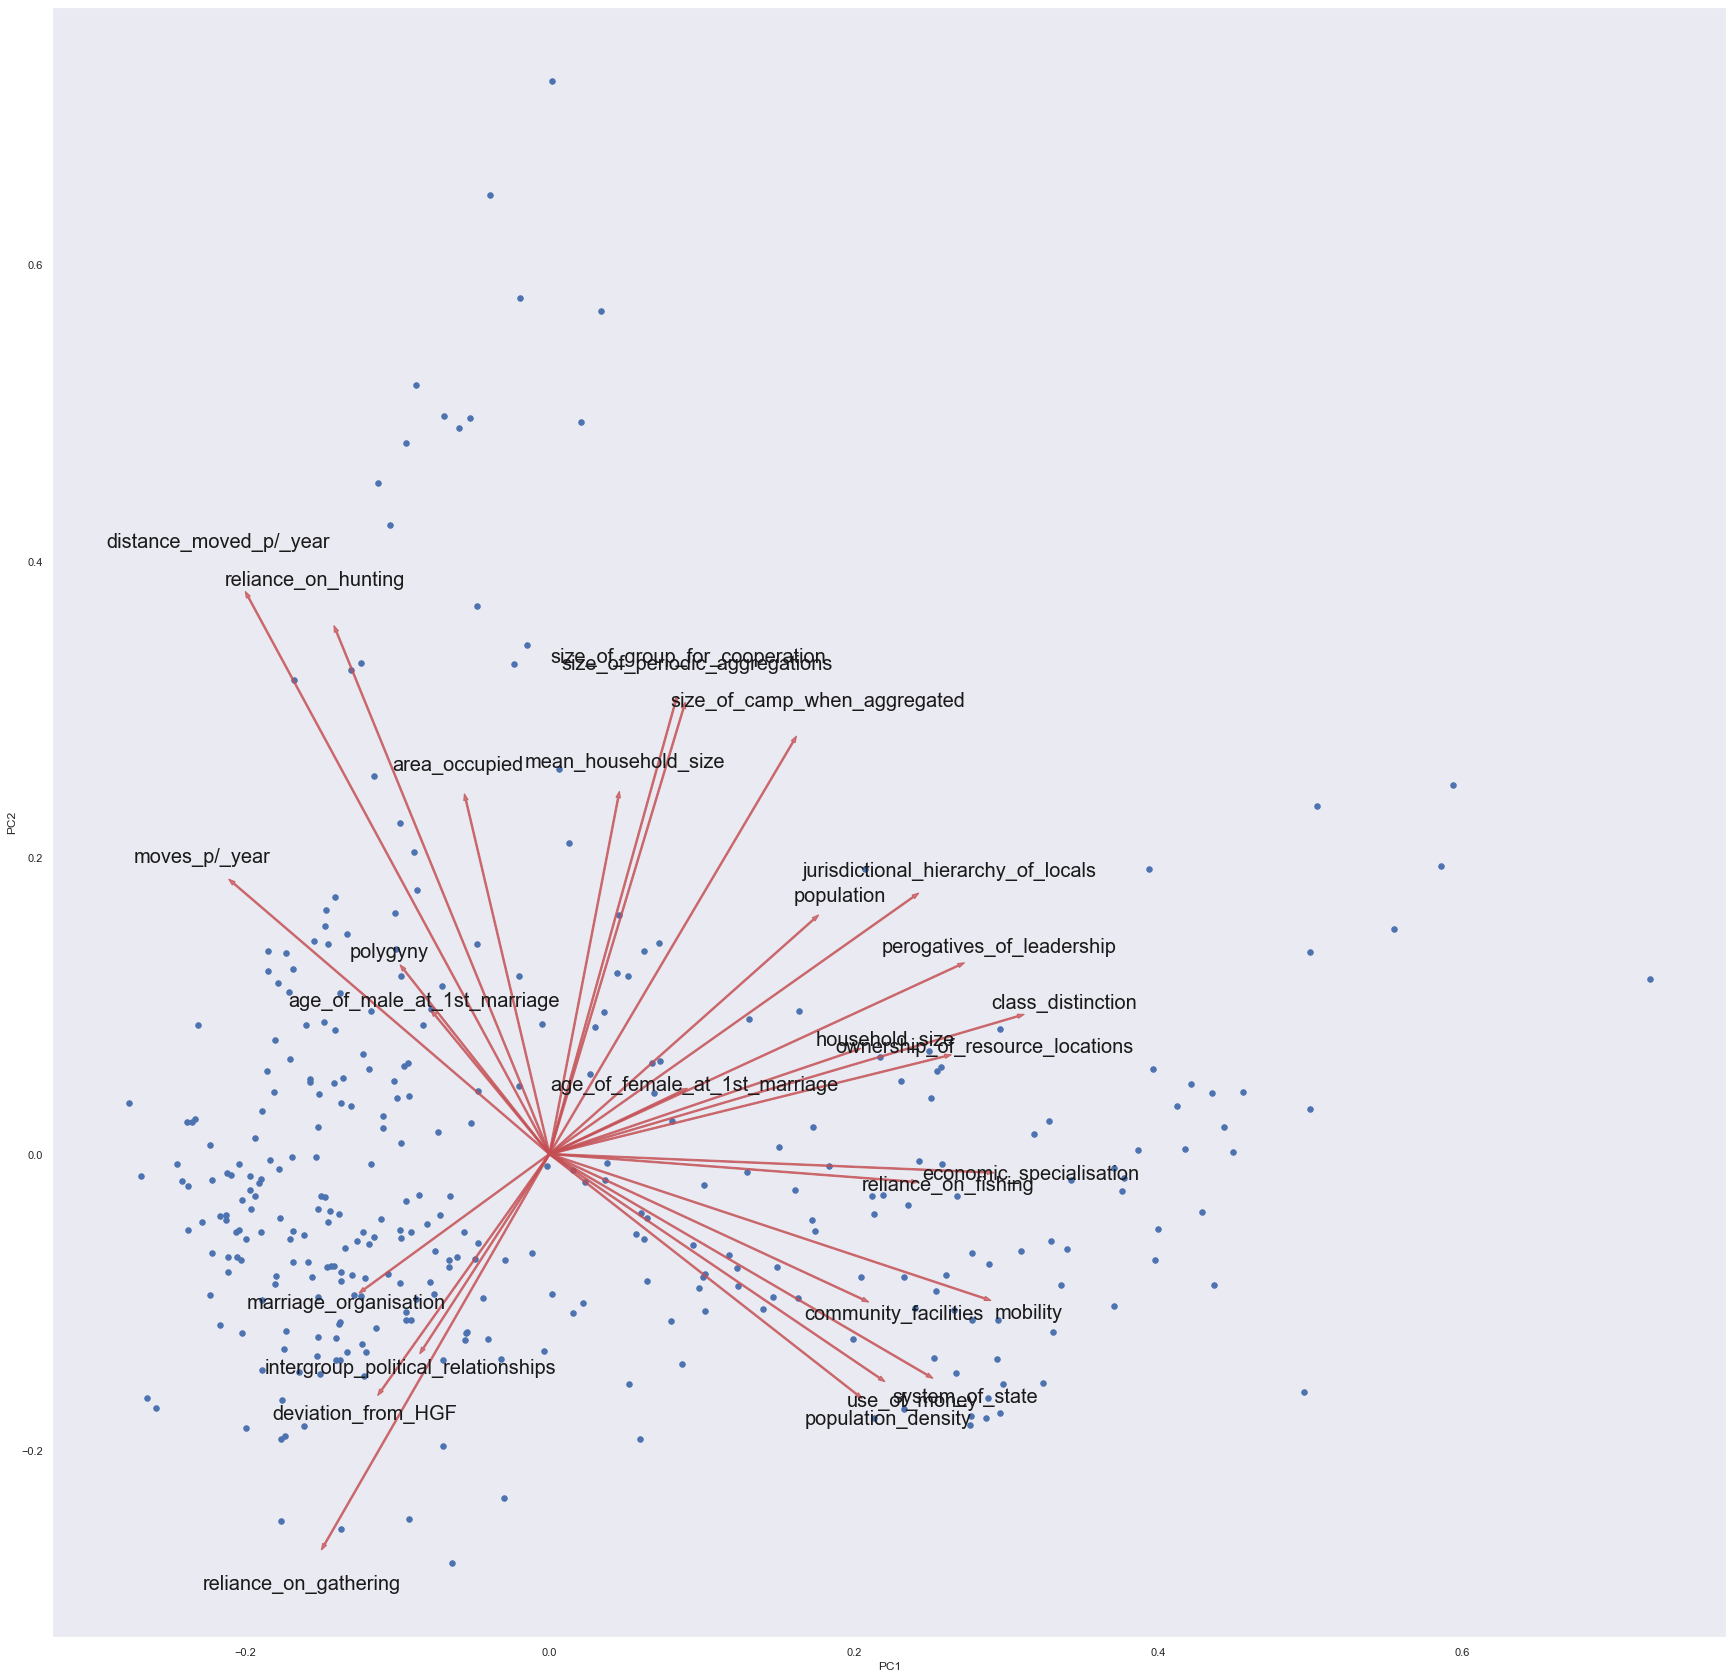

In [45]:
 #name the veriables
fig, ax = plt.subplots(figsize=(30, 30))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, s=30)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.75)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center', fontsize=20)
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'k', ha = 'center', va = 'center', fontsize=20)
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x2.columns))
plt.show()

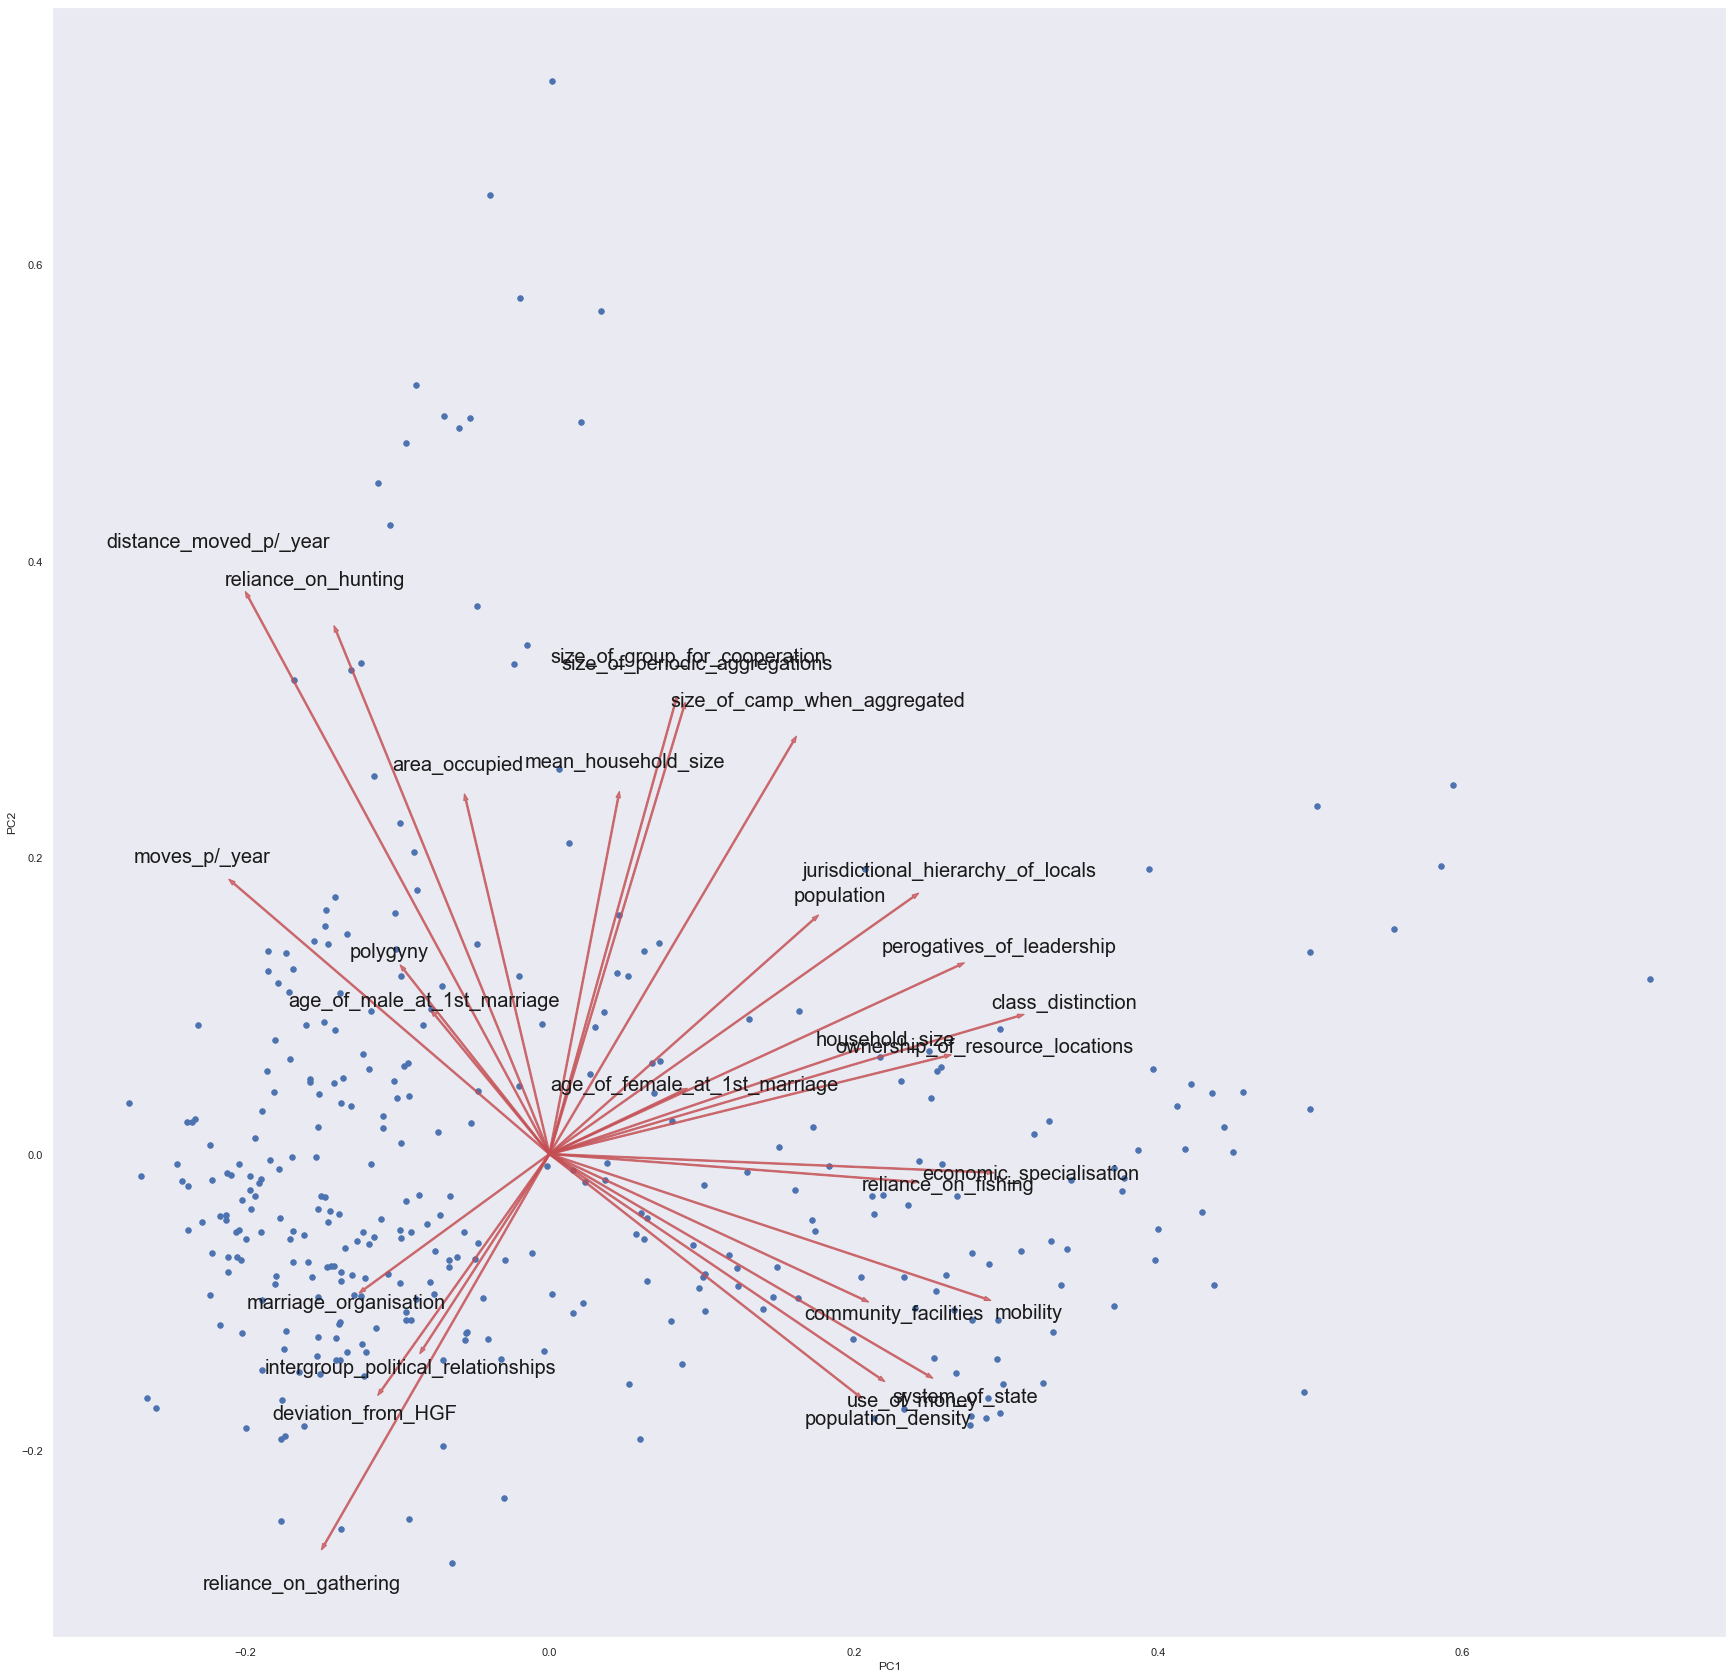

In [46]:
 #name the veriables
fig, ax = plt.subplots(figsize=(30, 30))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, s=30)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.75)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center', fontsize=20)
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'k', ha = 'center', va = 'center', fontsize=20)
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x2.columns))
plt.savefig("biplots.pdf")

In [47]:
Df = pd.concat([x2, y], axis = 1)
# main_subsistence_type = Subistence from hereon

In [48]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

In [49]:
maov = MANOVA.from_formula('polygyny + class_distinction + jurisdictional_hierarchy_of_locals + perogatives_of_leadership + ownership_of_resource_locations + system_of_state ~ Subsistence', data=Df)
#some sort of post hoc analysis maybe some box and whisker plots

In [50]:
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7401 6.0000 332.0000 19.4339 0.0000
         Pillai's trace 0.2599 6.0000 332.0000 19.4339 0.0000
 Hotelling-Lawley trace 0.3512 6.0000 332.0000 19.4339 0.0000
    Roy's greatest root 0.3512 6.0000 332.0000 19.4339 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
      Subsistence       Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7176 6.0000 332.0000 21.7790 0.0000
         Pillai's trace 0.2824 6.0000 332.0000 21.7790 0.0000
 Hotelling-Lawley trace 0.

In [51]:
#ANOVA and Pairwise Tukey as post hoc

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#could be done with the other variables (I guess)

In [53]:
model = ols('polygyny ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,1.477132,1.0,1.732629,0.18897
Residual,287.305330,337.0,NaN,NaN


In [54]:
tukey = pairwise_tukeyhsd(Df['polygyny'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0  -0.1905 0.3044 -0.4945 0.1134  False
   1.0    3.0  -0.1903 0.3321 -0.5057 0.1251  False
   2.0    3.0   0.0002    0.9 -0.2712 0.2717  False
---------------------------------------------------


In [55]:
model = ols('class_distinction ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,27.107286,1.0,29.289416,1.185567e-07
Residual,311.892714,337.0,NaN,NaN


In [56]:
tukey = pairwise_tukeyhsd(Df['class_distinction'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.3854 0.0066 -0.6813 -0.0895   True
   1.0    3.0   0.6366  0.001  0.3295  0.9437   True
   2.0    3.0    1.022  0.001  0.7577  1.2863   True
----------------------------------------------------


In [57]:
model = ols('jurisdictional_hierarchy_of_locals ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,4.15353,1.0,4.180243,0.041674
Residual,334.84647,337.0,NaN,NaN


In [58]:
tukey = pairwise_tukeyhsd(Df['jurisdictional_hierarchy_of_locals'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.4348 0.0039 -0.7516 -0.1181   True
   1.0    3.0    0.207 0.3013 -0.1218  0.5357  False
   2.0    3.0   0.6418  0.001  0.3589  0.9247   True
----------------------------------------------------


In [59]:
model = ols('perogatives_of_leadership ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,3.928136,1.0,3.967041,0.047206
Residual,333.695013,337.0,NaN,NaN


In [60]:
tukey = pairwise_tukeyhsd(Df['perogatives_of_leadership'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.4205 0.0055 -0.7374 -0.1036   True
   1.0    3.0   0.2016 0.3206 -0.1273  0.5305  False
   2.0    3.0   0.6221  0.001   0.339  0.9052   True
----------------------------------------------------


In [61]:
model = ols('ownership_of_resource_locations ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,35.743542,1.0,39.747849,9.057229e-10
Residual,303.049692,337.0,NaN,NaN


In [62]:
tukey = pairwise_tukeyhsd(Df['ownership_of_resource_locations'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0  -0.1577 0.4334 -0.4576 0.1422  False
   1.0    3.0   0.7733  0.001  0.4621 1.0845   True
   2.0    3.0    0.931  0.001  0.6632 1.1989   True
---------------------------------------------------


In [63]:
model = ols('system_of_state ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,79.383571,1.0,103.426515,2.297764e-21
Residual,258.659623,337.0,NaN,NaN


In [64]:
tukey = pairwise_tukeyhsd(Df['system_of_state'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   1.0    2.0   0.3572 0.0097 0.0716 0.6428   True
   1.0    3.0   1.2405  0.001 0.9442 1.5369   True
   2.0    3.0   0.8833  0.001 0.6282 1.1384   True
--------------------------------------------------


In [65]:
maov = MANOVA.from_formula('size_of_group_for_cooperation + size_of_camp_when_aggregated + size_of_periodic_aggregations + community_facilities ~ Subsistence', data=Df)

In [66]:
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8905 4.0000 334.0000 10.2707 0.0000
         Pillai's trace 0.1095 4.0000 334.0000 10.2707 0.0000
 Hotelling-Lawley trace 0.1230 4.0000 334.0000 10.2707 0.0000
    Roy's greatest root 0.1230 4.0000 334.0000 10.2707 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
      Subsistence       Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8858 4.0000 334.0000 10.7668 0.0000
         Pillai's trace 0.1142 4.0000 334.0000 10.7668 0.0000
 Hotelling-Lawley trace 0.

In [67]:
model = ols('size_of_group_for_cooperation ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,6.603407,1.0,8.765559,0.003287
Residual,253.874081,337.0,NaN,NaN


In [68]:
tukey = pairwise_tukeyhsd(Df['size_of_group_for_cooperation'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0  -0.8774 0.001  -1.144 -0.6108   True
   1.0    3.0  -0.4729 0.001 -0.7496 -0.1963   True
   2.0    3.0   0.4045 0.001  0.1663  0.6426   True
---------------------------------------------------


In [69]:
model = ols('size_of_camp_when_aggregated ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,1.288555,1.0,1.36175,0.244059
Residual,318.885909,337.0,NaN,NaN


In [70]:
tukey = pairwise_tukeyhsd(Df['size_of_camp_when_aggregated'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.5041  0.001 -0.8124 -0.1957   True
   1.0    3.0   0.0763 0.8229 -0.2437  0.3964  False
   2.0    3.0   0.5804  0.001   0.305  0.8558   True
----------------------------------------------------


In [71]:
model = ols('size_of_periodic_aggregations ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,3.122224,1.0,4.213318,0.04088
Residual,249.729414,337.0,NaN,NaN


In [72]:
tukey = pairwise_tukeyhsd(Df['size_of_periodic_aggregations'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.6889  0.001 -0.9599  -0.418   True
   1.0    3.0  -0.3379 0.0137 -0.6191 -0.0567   True
   2.0    3.0    0.351 0.0021   0.109   0.593   True
----------------------------------------------------


In [73]:
model = ols('community_facilities ~ Subsistence', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subsistence,16.81497,1.0,17.58817,0.000035
Residual,322.18503,337.0,NaN,NaN


In [74]:
tukey = pairwise_tukeyhsd(Df['community_facilities'],
                          Df['Subsistence'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.2305  0.213 -0.0917 0.5526  False
   1.0    3.0   0.5808  0.001  0.2465 0.9151   True
   2.0    3.0   0.3503 0.0122  0.0626  0.638   True
---------------------------------------------------


In [75]:
#CANONONICAL CORRELATION

In [76]:
#group variables - take out least correlated (which is polygyny) (maybe)

cooperation = Df[['size_of_group_for_cooperation', 'size_of_camp_when_aggregated', 'size_of_periodic_aggregations', 'community_facilities']]
hierarchy = Df[['polygyny', 'class_distinction', 'jurisdictional_hierarchy_of_locals', 'perogatives_of_leadership', 'ownership_of_resource_locations', 'system_of_state']]

In [77]:
hierarchy_cor = hierarchy.corr(method='spearman')
#sns.clustermap(hierarchy_cor)

In [78]:
cooperation_cor = cooperation.corr(method='spearman')
#sns.clustermap(cooperation_cor)

In [79]:
from sklearn.cross_decomposition import CCA


In [80]:
hierarchy_mc = (hierarchy-hierarchy.mean())/(hierarchy.std())
#hierarchy_mc.head()

In [81]:
cooperation_mc = (cooperation-cooperation.mean())/(cooperation.std())
#cooperation_mc.head()

In [82]:
ca = CCA()
ca.fit(hierarchy, cooperation)
hierarchy_c, cooperation_c = ca.transform(hierarchy, cooperation)

In [83]:
print(hierarchy_c.shape)
print(cooperation_c.shape)
(333,2)
(333,2)

(339, 2)
(339, 2)


(333, 2)

In [84]:
import numpy as np
np.corrcoef(hierarchy_c[:, 0], cooperation_c[:, 0])


array([[1.        , 0.74952447],
       [0.74952447, 1.        ]])

In [85]:
np.corrcoef(hierarchy_c[:, 1], cooperation_c[:, 1])

array([[1.        , 0.56702863],
       [0.56702863, 1.        ]])

In [86]:
cc_res = pd.DataFrame({"canonical_variable_hierarchy1":hierarchy_c[:, 0],
                       "canonical_variable_cooperation1":cooperation_c[:, 0],
                       "canonical_variable_hierarchy2":hierarchy_c[:, 1],
                       "canonical_veriable_cooperation2":cooperation_c[:, 1],
                      "use of money":Df.use_of_money.tolist(),
                      "economic specialisation":Df.economic_specialisation.tolist()})

In [88]:
my_pal = ["r","g","b"]
sns.set_palette(sns.color_palette(my_pal))
legend = ['hunting', 'gathering', 'fishing']

Text(0.5, 1.0, 'Comp. 1, corr = 0.75')

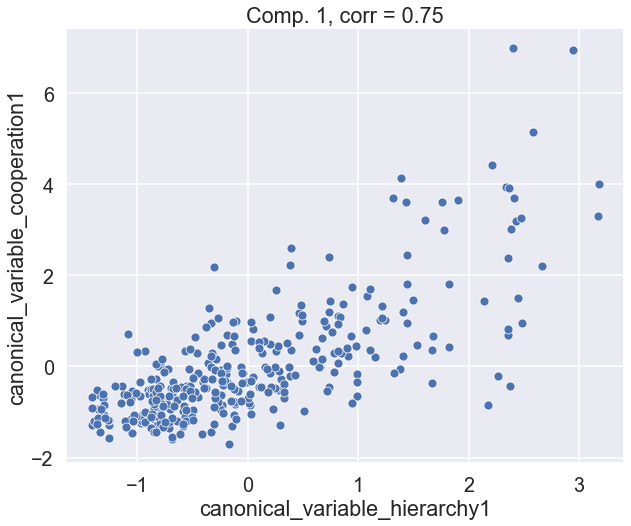

In [87]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="canonical_variable_hierarchy1",
                y="canonical_variable_cooperation1", 
                data=cc_res)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(hierarchy_c[:, 0], cooperation_c[:, 0])[0, 1])


[[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]]

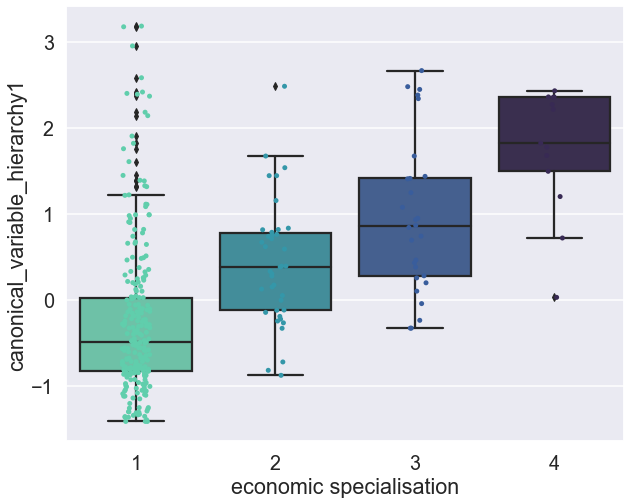

In [89]:
plt.figure(figsize=(10,8))
g = sns.boxplot(x="economic specialisation",
                y="canonical_variable_hierarchy1", palette="mako_r",
               data=cc_res)
sns.stripplot(x="economic specialisation",
                y="canonical_variable_hierarchy1", palette="mako_r",
                 data=cc_res)


g.set(xticklabels=["1", "2", "3", "4"])#WTF is going on with the x axis



[[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]]

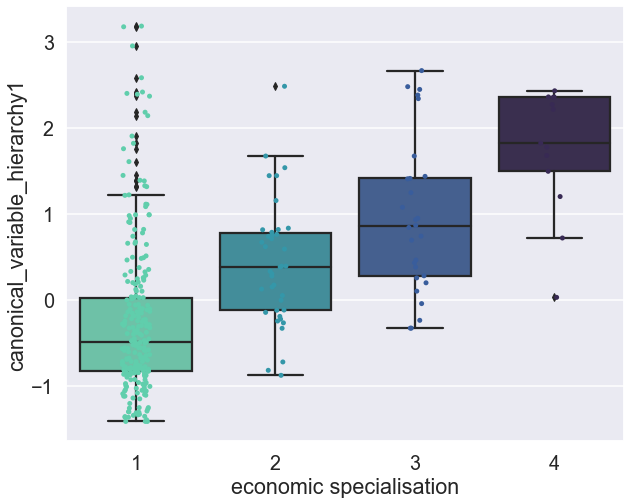

In [89]:
plt.figure(figsize=(10,8))
g = sns.boxplot(x="economic specialisation",
                y="canonical_variable_hierarchy1", palette="mako_r",
               data=cc_res)
sns.stripplot(x="economic specialisation",
                y="canonical_variable_hierarchy1", palette="mako_r",
                 data=cc_res)


g.set(xticklabels=["1", "2", "3", "4"])#WTF is going on with the x axis



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10, 8))

# Plot
sns.scatterplot(x="canonical_variable_hierarchy1",
                y="canonical_variable_cooperation1", 
                data=cc_res)

# Add title
plt.title('Comp. 1, corr = %.2f' %
          np.corrcoef(hierarchy_c[:, 0], cooperation_c[:, 0])[0, 1])

# Save the figure
plt.savefig("comp1_scatterplot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

[[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]]

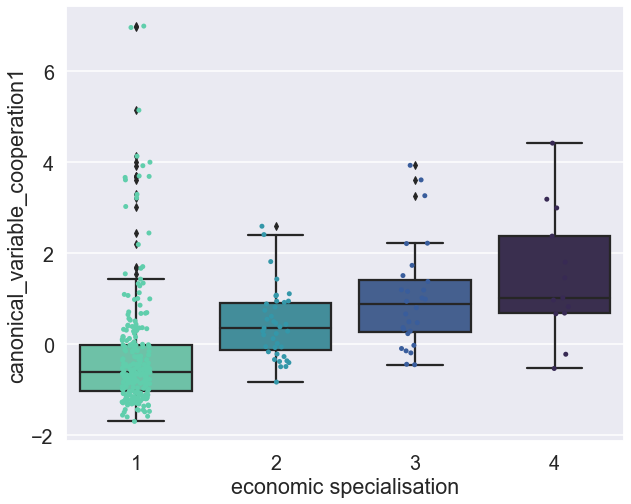

In [90]:
plt.figure(figsize=(10,8))
g = sns.boxplot(x="economic specialisation",
                y="canonical_variable_cooperation1", palette="mako_r",
               data=cc_res)
sns.stripplot(x="economic specialisation",
                y="canonical_variable_cooperation1", palette="mako_r",
                 data=cc_res)


g.set(xticklabels=["1", "2", "3", "4"])#WTF is going on with the x axis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Create the boxplot
g = sns.boxplot(x="economic specialisation",
                y="canonical_variable_cooperation1",
                palette="mako_r", data=cc_res)

# Add stripplot
sns.stripplot(x="economic specialisation",
              y="canonical_variable_cooperation1",
              palette="mako_r", data=cc_res, dodge=True)

# Set x-axis labels (fix WTF issue with x-axis)
g.set_xticklabels(["1", "2", "3", "4"])

# Add title
plt.title("Cooperation by Economic Specialisation")

# Save the figure
plt.savefig("economic_specialisation_vs_cooperation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

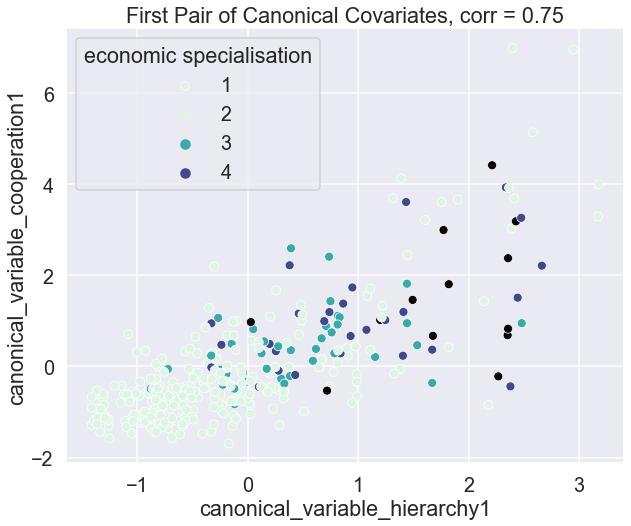

In [91]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="canonical_variable_hierarchy1",
                y="canonical_variable_cooperation1", 
                hue="economic specialisation", palette = "mako_r", data=cc_res)
plt.title('First Pair of Canonical Covariates, corr = %.2f' %
         np.corrcoef(hierarchy_c[:, 0], cooperation_c[:, 0])[0, 1])
plt.legend(title='economic specialisation', labels=['1', '2', '3', '4'], loc='upper left')


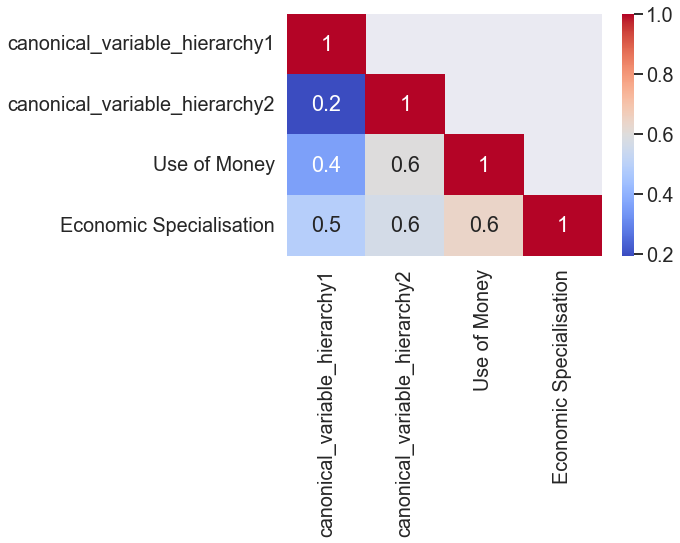

In [92]:
ccH_df = pd.DataFrame({"canonical_variable_hierarchy1":hierarchy_c[:, 0],
                       "canonical_variable_hierarchy2":hierarchy_c[:, 1],
                       
                       "Use of Money":Df.use_of_money.astype('category').cat.codes,
                       "Economic Specialisation":Df.economic_specialisation.astype('category').cat.codes
                      })

corr_H_df= ccH_df.corr(method='spearman') 
#corr_X_df.head()

plt.figure(figsize=(10,8))
H_df_lt = corr_H_df.where(np.tril(np.ones(corr_H_df.shape)).astype(np.bool))

sns.heatmap(H_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()

<AxesSubplot:>

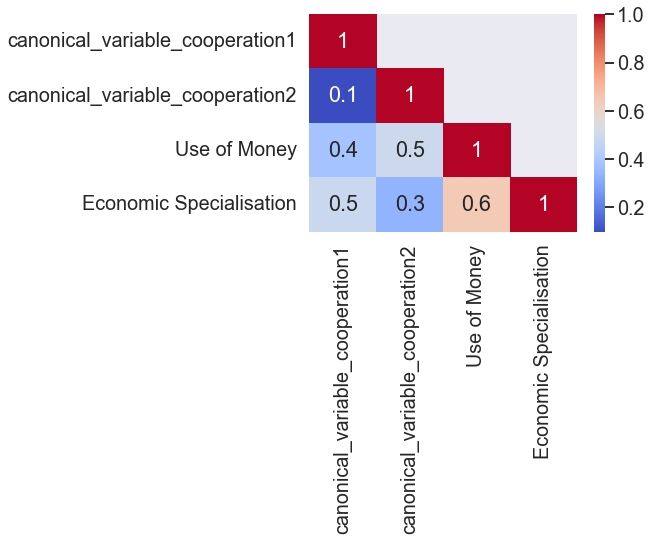

In [93]:
# second pair of canonical covariates with the dataset 
ccC_df = pd.DataFrame({"canonical_variable_cooperation1":cooperation_c[:, 0],
                       "canonical_variable_cooperation2":cooperation_c[:, 1],
                       
                       "Use of Money":Df.use_of_money.astype('category').cat.codes,
                       "Economic Specialisation":Df.economic_specialisation.astype('category').cat.codes
                      })
 
# compute correlation with Pandas corr()
corr_C_df= ccC_df.corr(method='spearman') 
 
# Get lower triangular correlation matrix
C_df_lt = corr_C_df.where(np.tril(np.ones(corr_C_df.shape)).astype(np.bool))
 
# make a lower triangular correlation heatmap with Seaborn

sns.heatmap(C_df_lt,cmap="coolwarm",annot=True,fmt='.1g')



In [94]:
from yellowbrick.features import PCA

In [95]:
Df = pd.concat([x2, y], axis = 1)

In [96]:
Df["hierarchy"] = Df['class_distinction']+Df['jurisdictional_hierarchy_of_locals']+Df['perogatives_of_leadership']+Df['ownership_of_resource_locations']+Df['system_of_state']+Df['polygyny']

In [97]:
#df["hierarchy"]=df['hierarchy']/6

In [98]:
Df["cooperation"] = Df['size_of_group_for_cooperation']+ Df['size_of_camp_when_aggregated']+Df['size_of_periodic_aggregations']+Df['community_facilities']

In [99]:
#df["cooperation"]=df['cooperation']/4

In [100]:
y = Df['hierarchy']

In [101]:
x = Df.drop(['hierarchy','polygyny', 
            'class_distinction', 
            'jurisdictional_hierarchy_of_locals', 
            'perogatives_of_leadership', 
            'ownership_of_resource_locations', 'system_of_state'], 1)

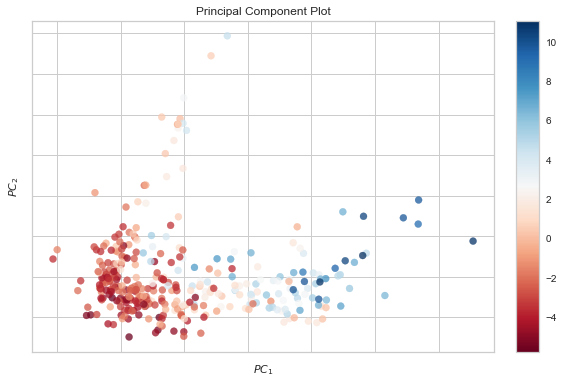

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [102]:

visualizer = PCA(scale=True, proj_features=False)
visualizer.fit_transform(x, y)
visualizer.show()

In [103]:
y1 = Df['cooperation']

In [104]:
x1 = Df.drop(['cooperation','size_of_group_for_cooperation', 
            'size_of_camp_when_aggregated', 
            'size_of_periodic_aggregations', 
            'community_facilities'], 1)

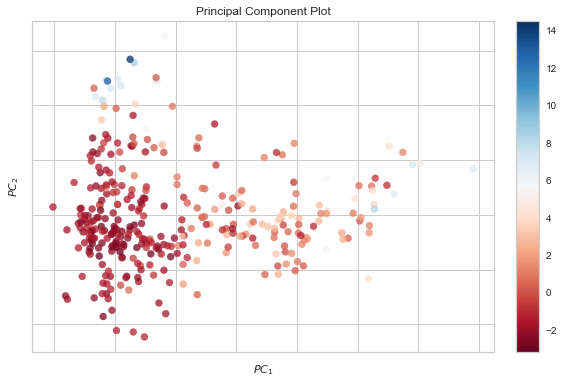

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [105]:

visualizer = PCA(scale=True, proj_features=False)
visualizer.fit_transform(x1, y1)
visualizer.show()